# Import packages

In [1]:
import pandas as pd
import numpy as np
import glob
import os 
import plotly.express as px
import matplotlib.pyplot as plt
import tqdm
from functions import *

# Look at the data

In [2]:
path = 'steam_game_libraries_v1.npz'

steamid_appid_playtime_arr = np.load(path)["arr_0"]

In [3]:
steamid_appid_playtime_arr.shape

(492846002, 3)

In [4]:
steamid_appid_playtime_df = pd.DataFrame(steamid_appid_playtime_arr,
                                         columns=["steamid", "appid", "playtime_minutes"])
steamid_appid_playtime_df

,steamid,appid,playtime_minutes
0,76561197960265841,10,0
1,76561197960265841,20,0
2,76561197960265841,30,0
3,76561197960265841,40,0
4,76561197960265841,50,0
...,...,...,...
492845997,76561199565324828,632730,0
492845998,76561199565324828,644320,0
492845999,76561199565324828,679990,0
492846000,76561199565324828,1817070,0


# Analysis of the number of games purchased

## General analysis

### Number of games purchased per user

In [5]:
library_sizes = group_data(steamid_appid_playtime_df, "steamid", "size")

In [6]:
describe_perc(library_sizes)

count    1.737372e+06
mean     2.836733e+02
std      5.015478e+02
min      1.000000e+00
1%       2.300000e+01
5%       4.200000e+01
10%      5.700000e+01
25%      9.400000e+01
50%      1.670000e+02
75%      3.050000e+02
90%      5.580000e+02
95%      8.420000e+02
99%      1.998000e+03
max      3.656200e+04
dtype: float64

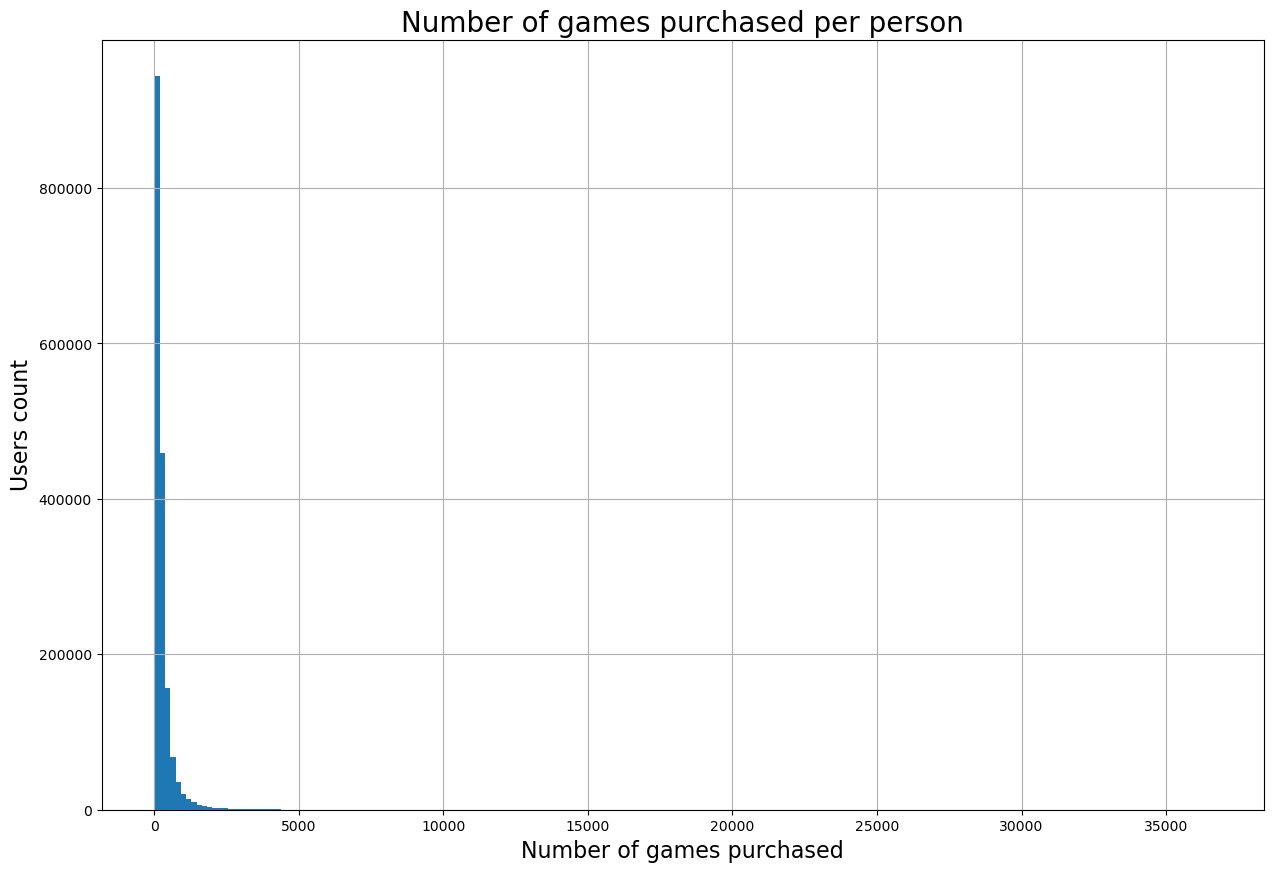

In [7]:
plot(library_sizes, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person')

In [8]:
filtered_library_sizes = filter_data(library_sizes, 0.01, 0.99)

describe_perc(filtered_library_sizes)                    

count    1.703570e+06
mean     2.510059e+02
std      2.602098e+02
min      2.300000e+01
1%       2.900000e+01
5%       4.500000e+01
10%      5.900000e+01
25%      9.500000e+01
50%      1.670000e+02
75%      3.010000e+02
90%      5.320000e+02
95%      7.650000e+02
99%      1.396000e+03
max      1.998000e+03
dtype: float64

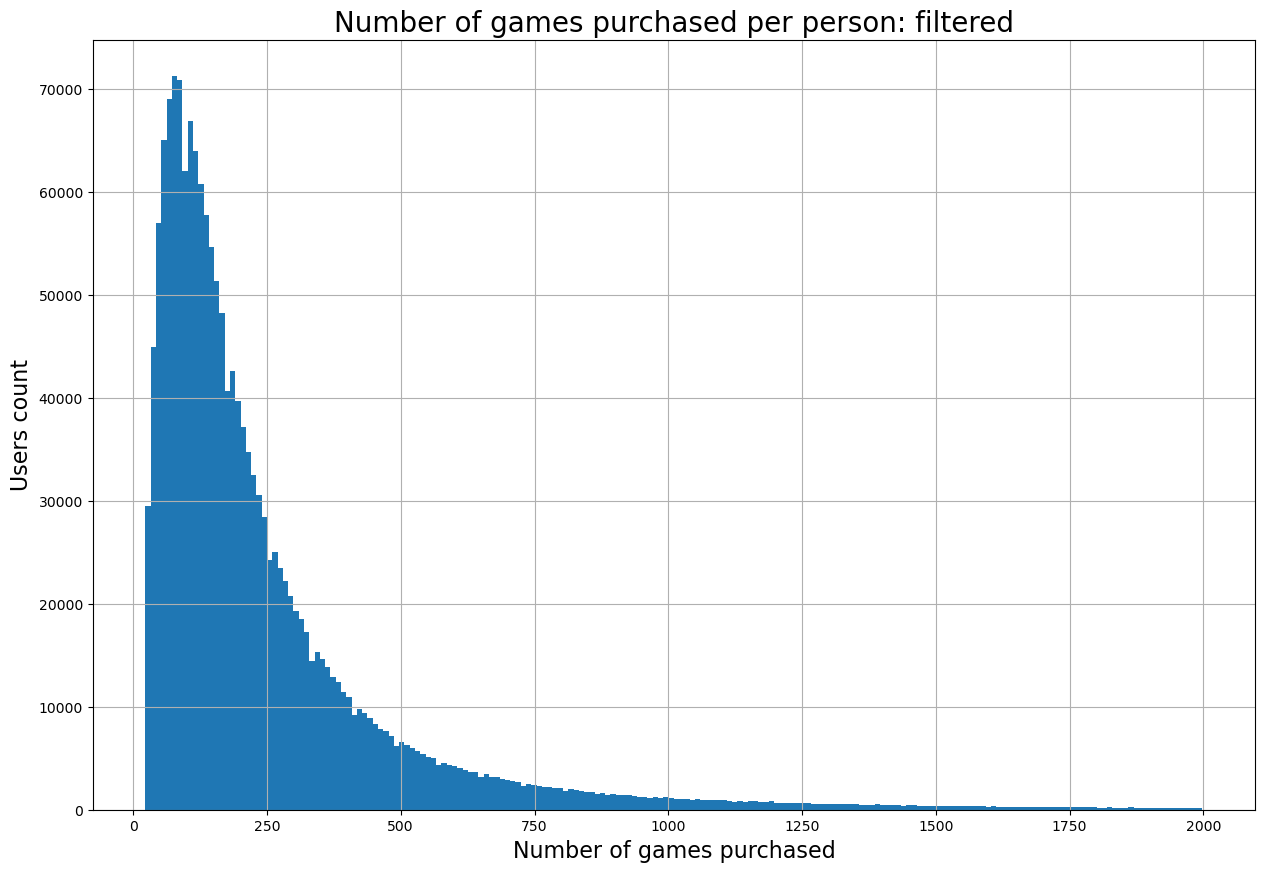

In [9]:
plot(filtered_library_sizes, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person: filtered')

**Conclusions**: 
* Most users own less than 200 games
* There are heavy outliers with > 5 000 games

###  Number of purchasers per game

In [10]:
game_sizes = group_data(steamid_appid_playtime_df, "appid", "size")

In [11]:
describe_perc(game_sizes)

count    3.851400e+04
mean     1.279654e+04
std      4.725084e+04
min      1.000000e+00
1%       2.000000e+00
5%       2.500000e+01
10%      6.400000e+01
25%      2.990000e+02
50%      1.702000e+03
75%      6.578750e+03
90%      2.674230e+04
95%      5.494065e+04
99%      2.057356e+05
max      1.521100e+06
dtype: float64

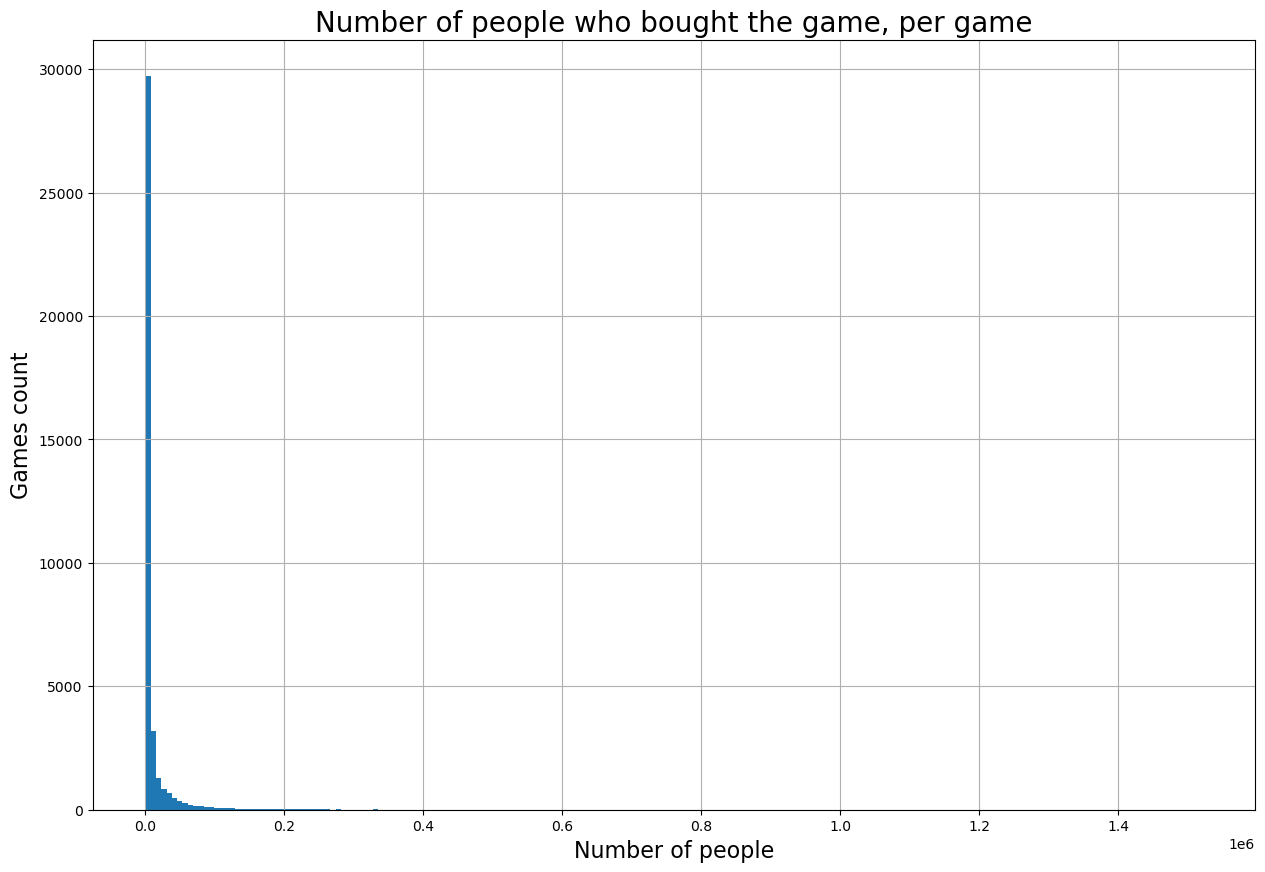

In [12]:
plot(game_sizes, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game')

In [13]:
filtered_game_sizes = filter_data(game_sizes, 0.05, 0.95) # between 5% and 95%
describe_perc(filtered_game_sizes)

count    34693.000000
mean      5570.140144
std       9572.930458
min         25.000000
1%          31.000000
5%          60.000000
10%        103.000000
25%        360.000000
50%       1699.000000
75%       5693.000000
90%      16190.600000
95%      28692.400000
99%      46659.280000
max      54913.000000
dtype: float64

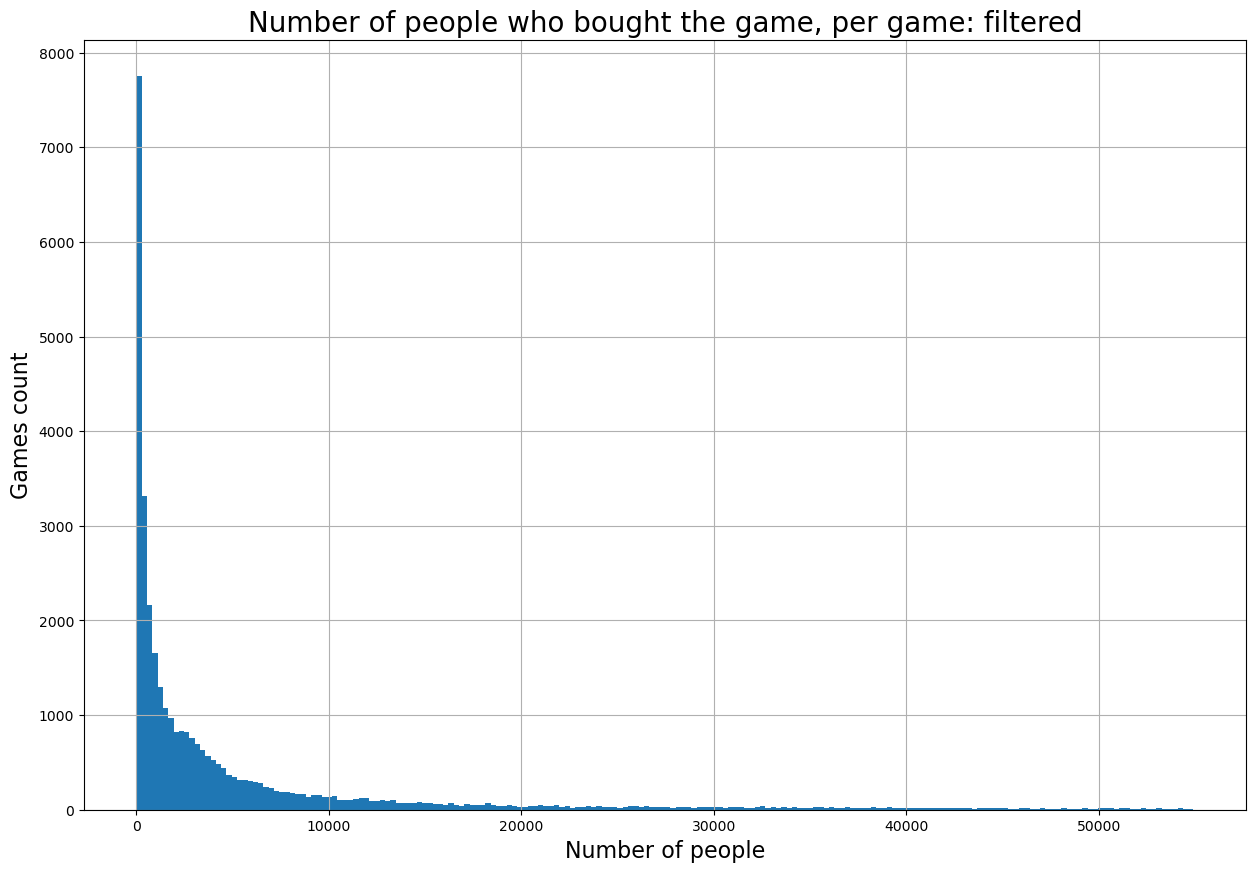

In [14]:
plot(filtered_game_sizes, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game: filtered')

**Conclusions:**
* Most games have less than 5 000 owners
* Very few games have more than 100 000 owners

## Analysis with playtime greater than 0

### Number of games purchased per user

In [15]:
library_sizes_nonzero = group_data(steamid_appid_playtime_df[
    steamid_appid_playtime_df['playtime_minutes'] > 0], "steamid", "size")

In [16]:
describe_perc(library_sizes_nonzero)

count    1.592354e+06
mean     1.737967e+02
std      2.374848e+02
min      1.000000e+00
1%       1.800000e+01
5%       3.200000e+01
10%      4.200000e+01
25%      6.800000e+01
50%      1.170000e+02
75%      2.030000e+02
90%      3.390000e+02
95%      4.700000e+02
99%      9.790000e+02
max      1.970500e+04
dtype: float64

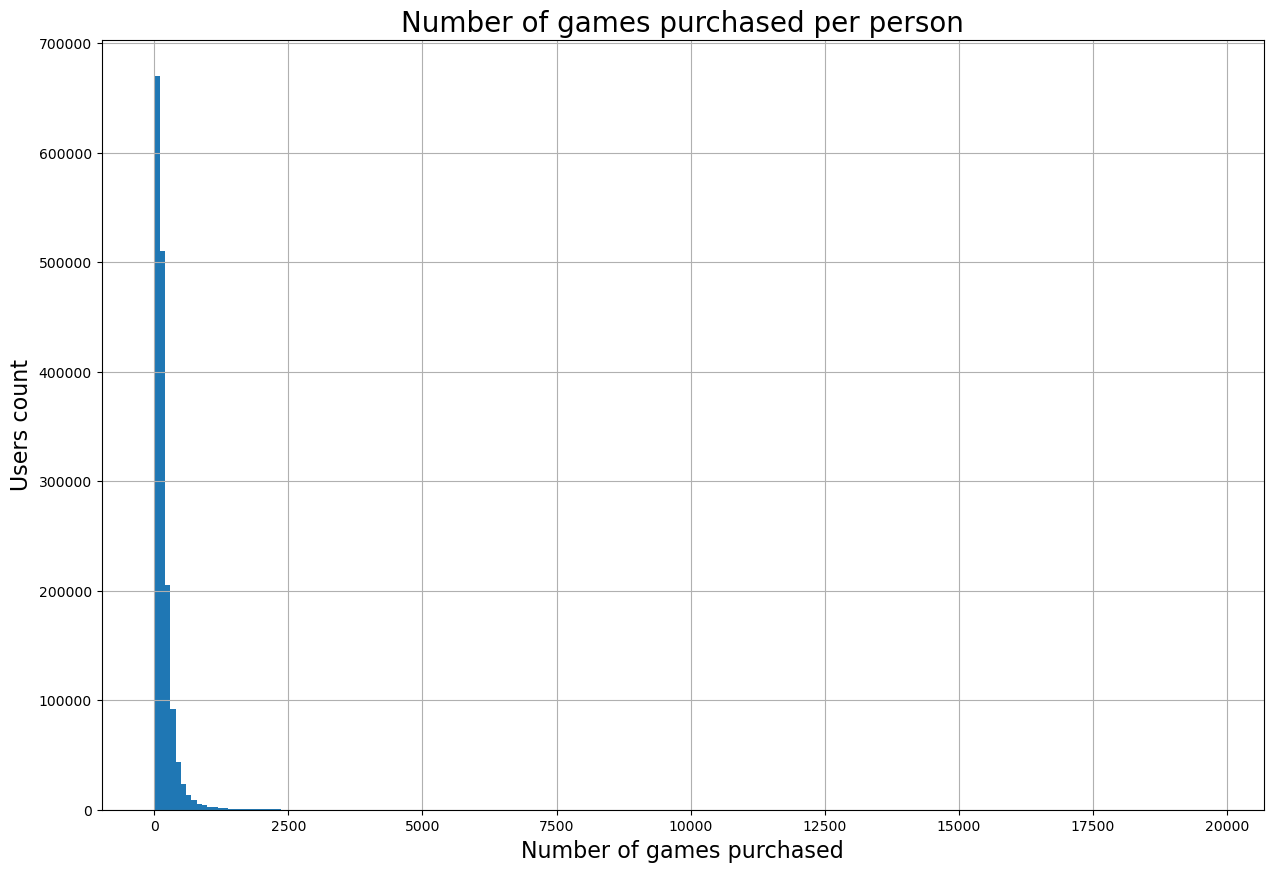

In [17]:
plot(library_sizes_nonzero, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person')

In [18]:
filtered_library_sizes_nonzero = filter_data(library_sizes_nonzero, 0.01, 0.99)
describe_perc(filtered_library_sizes_nonzero)                    

count    1.562131e+06
mean     1.591939e+02
std      1.373678e+02
min      1.800000e+01
1%       2.200000e+01
5%       3.300000e+01
10%      4.300000e+01
25%      6.900000e+01
50%      1.170000e+02
75%      2.000000e+02
90%      3.260000e+02
95%      4.350000e+02
99%      7.140000e+02
max      9.790000e+02
dtype: float64

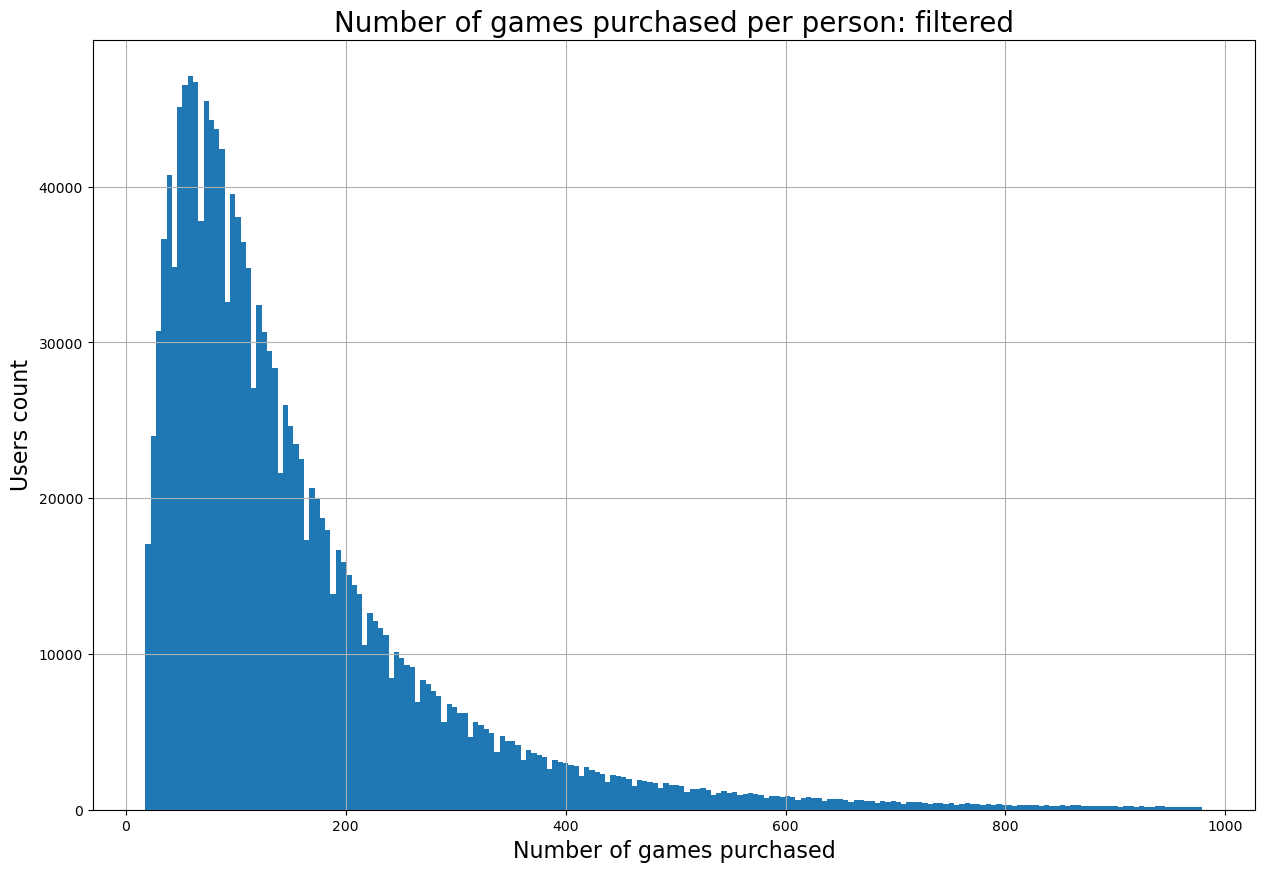

In [19]:
plot(filtered_library_sizes_nonzero, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person: filtered')

###  Number of purchasers per game

In [20]:
game_sizes_nonzero = group_data(steamid_appid_playtime_df[
    steamid_appid_playtime_df['playtime_minutes'] > 0], "appid", "size")

In [21]:
describe_perc(game_sizes_nonzero)

count    3.782500e+04
mean     7.316478e+03
std      3.312631e+04
min      1.000000e+00
1%       1.000000e+00
5%       7.000000e+00
10%      1.700000e+01
25%      9.100000e+01
50%      5.330000e+02
75%      3.100000e+03
90%      1.318420e+04
95%      2.966080e+04
99%      1.319080e+05
max      1.347012e+06
dtype: float64

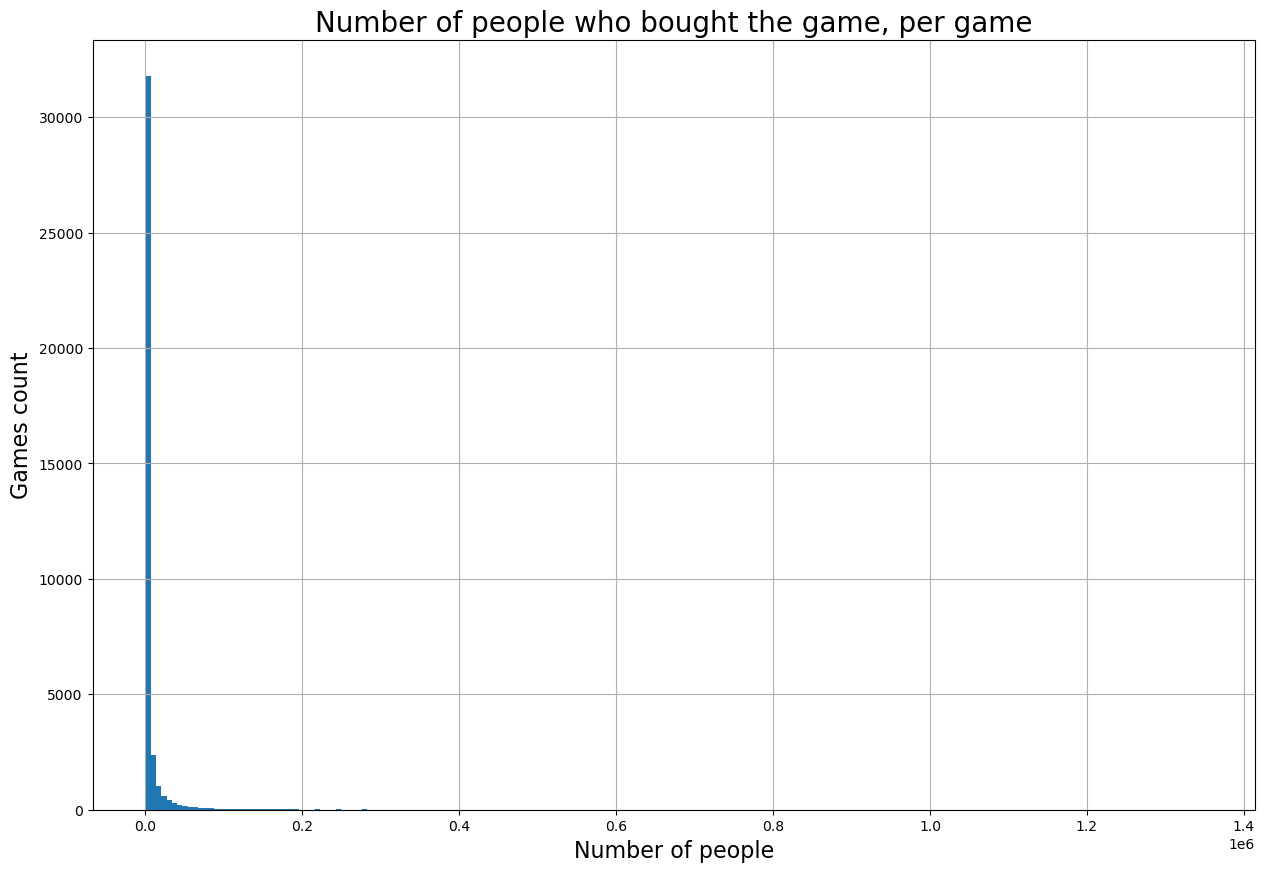

In [22]:
plot(game_sizes_nonzero, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game')

In [23]:
filtered_game_sizes_nonzero = filter_data(game_sizes_nonzero, 0.05, 0.95)

describe_perc(filtered_game_sizes_nonzero)

count    34136.000000
mean      2660.400691
std       4986.898706
min          7.000000
1%           8.000000
5%          15.000000
10%         30.000000
25%        109.000000
50%        528.000000
75%       2546.250000
90%       8307.500000
95%      14108.250000
99%      24986.950000
max      29636.000000
dtype: float64

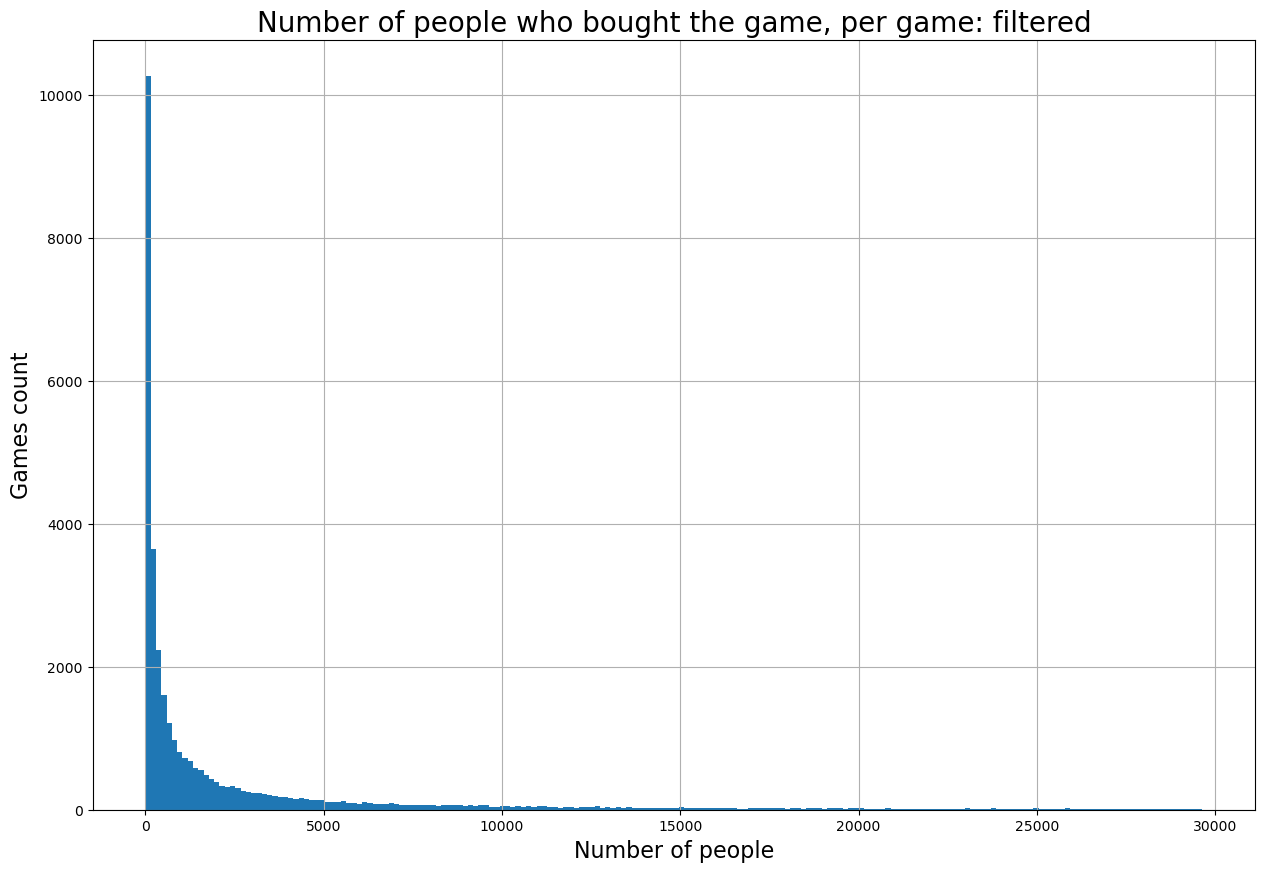

In [24]:
plot(filtered_game_sizes_nonzero, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game: filtered')

**The conclusions for non-zero playtime games are the same as the general conclusions**

## Analysis with playtime equal to 0

### Number of games purchased per user

In [25]:
library_sizes_zero = group_data(steamid_appid_playtime_df[
    steamid_appid_playtime_df['playtime_minutes'] == 0], "steamid", "size")

In [26]:
describe_perc(library_sizes_zero)

count    1.729733e+06
mean     1.249327e+02
std      3.472270e+02
min      1.000000e+00
1%       2.000000e+00
5%       6.000000e+00
10%      9.000000e+00
25%      2.100000e+01
50%      4.700000e+01
75%      1.120000e+02
90%      2.580000e+02
95%      4.470000e+02
99%      1.256680e+03
max      3.595200e+04
dtype: float64

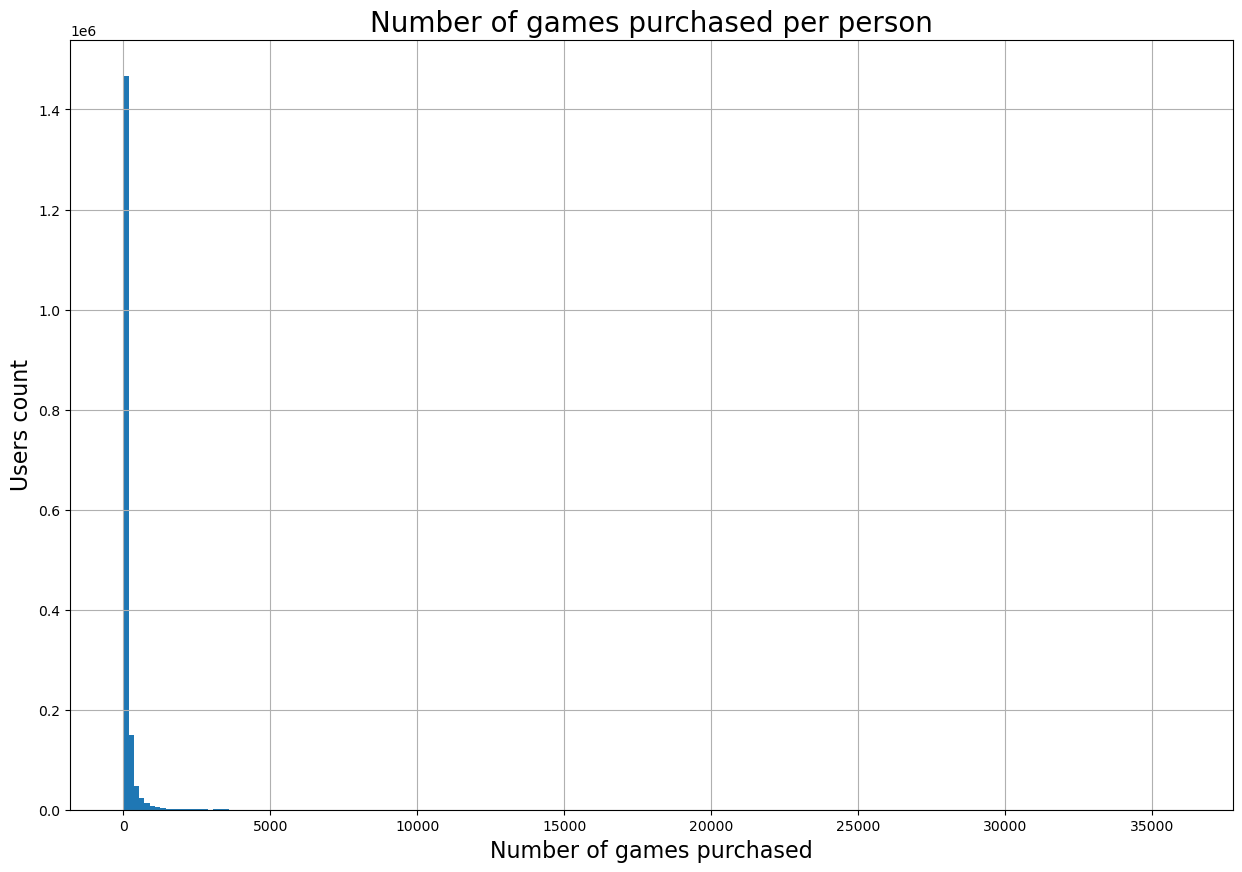

In [27]:
plot(library_sizes_zero, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person')

In [28]:
filtered_library_sizes_zero = filter_data(library_sizes_zero, 0.01, 0.99) # between 1% and 99%

describe_perc(filtered_library_sizes_zero)                    

count    1.701129e+06
mean     1.009275e+02
std      1.539528e+02
min      2.000000e+00
1%       3.000000e+00
5%       6.000000e+00
10%      1.000000e+01
25%      2.100000e+01
50%      4.700000e+01
75%      1.100000e+02
90%      2.420000e+02
95%      3.940000e+02
99%      8.380000e+02
max      1.256000e+03
dtype: float64

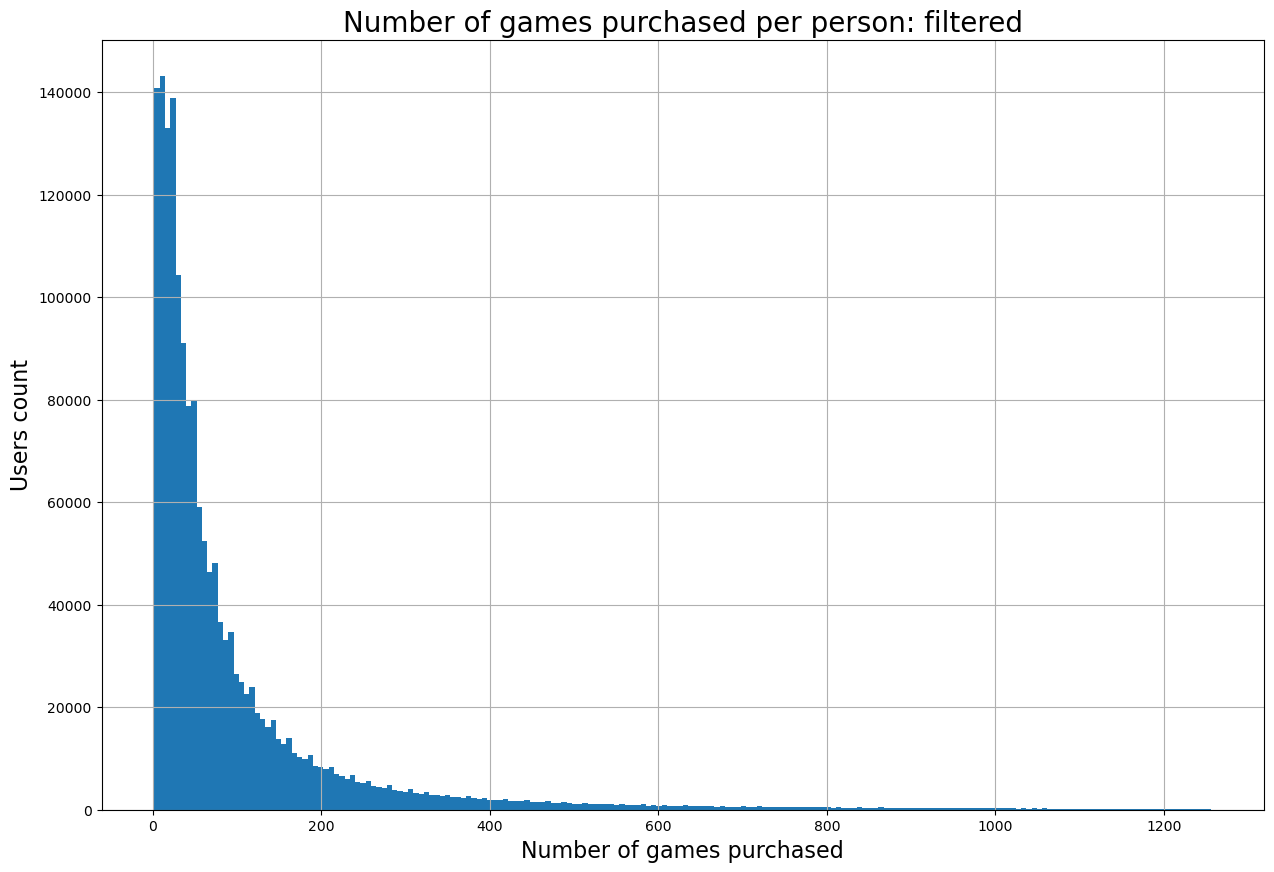

In [29]:
plot(filtered_library_sizes_zero, 'Users count', 
     'Number of games purchased', 
     'Number of games purchased per person: filtered')

###  Number of purchasers per game

In [30]:
game_sizes_zero = group_data(steamid_appid_playtime_df[
    steamid_appid_playtime_df['playtime_minutes'] == 0], "appid", "size")

In [31]:
describe_perc(game_sizes_zero)

count     38357.000000
mean       5633.918476
std       20374.893825
min           1.000000
1%            2.000000
5%           17.000000
10%          40.000000
25%         153.000000
50%         833.000000
75%        3490.000000
90%       11781.600000
95%       26413.800000
99%       78378.240000
max      900161.000000
dtype: float64

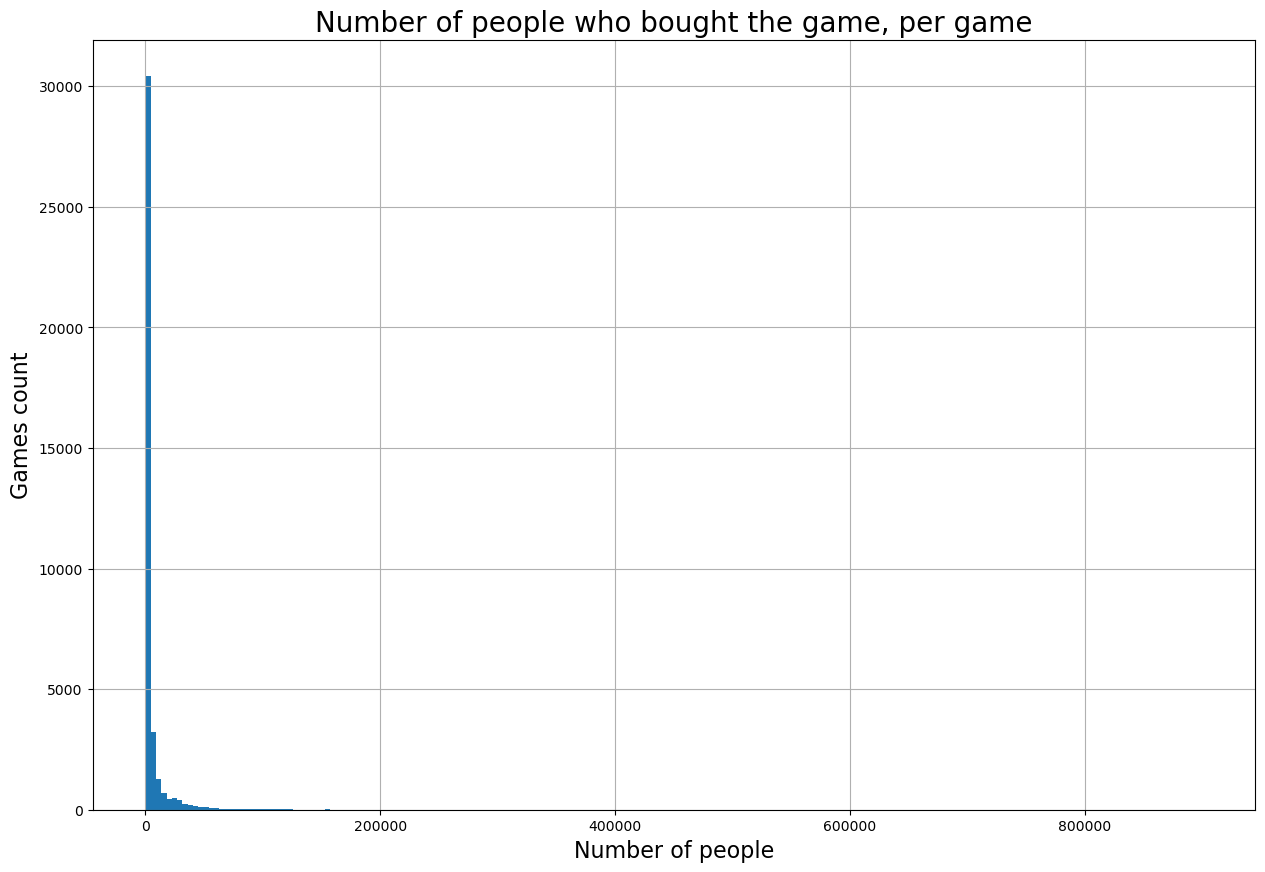

In [32]:
plot(game_sizes_zero, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game')

In [33]:
filtered_game_sizes_zero = filter_data(game_sizes_zero, 0.01, 0.99)

describe_perc(filtered_game_sizes_zero)

count    37643.000000
mean      4145.917275
std       9163.779990
min          2.000000
1%           3.000000
5%          20.000000
10%         43.000000
25%        158.000000
50%        830.000000
75%       3387.000000
90%      10577.800000
95%      23016.600000
99%      48823.440000
max      78292.000000
dtype: float64

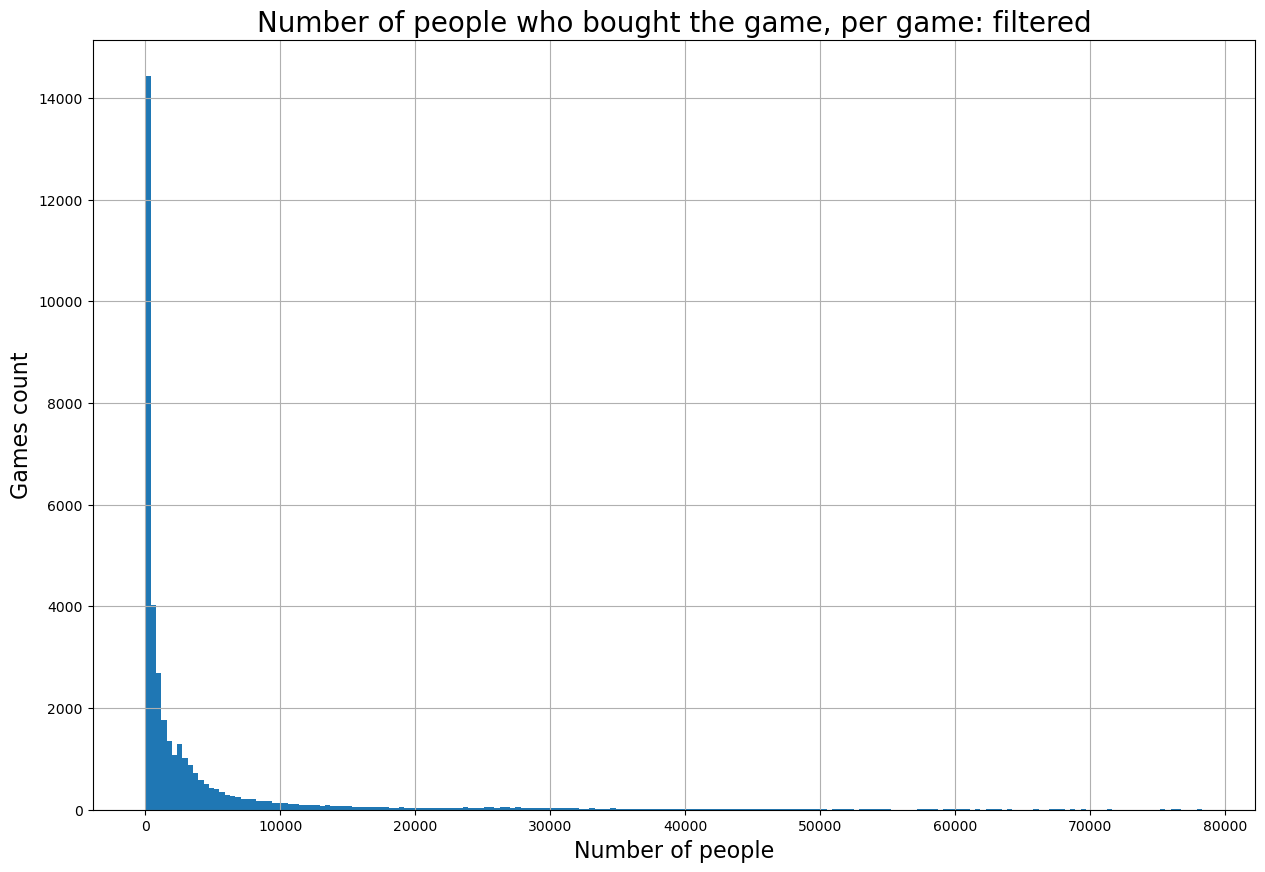

In [34]:
plot(filtered_game_sizes_zero, 'Games count', 
     'Number of people', 
     'Number of people who bought the game, per game: filtered')

**The conclusions for zero playtime games are the same as the general conclusions**

# Analysis of playtime

In [35]:
zero_playtime_ratio = (steamid_appid_playtime_df['playtime_minutes'] == 0).mean()
zero_playtime_ratio

0.438474107780223

**In total, slightly less than half of the observations in the data are with zero playtime**

## Playtime minutes by users

In [36]:
zero_playtime_ratio_users = steamid_appid_playtime_df.groupby('steamid')['playtime_minutes'].apply(lambda x: (x == 0).mean())

describe_perc(zero_playtime_ratio_users).round(4)

count    1.737372e+06
mean     3.494000e-01
std      2.515000e-01
min      0.000000e+00
1%       3.230000e-02
5%       8.180000e-02
10%      1.129000e-01
25%      1.771000e-01
50%      2.777000e-01
75%      4.311000e-01
90%      7.263000e-01
95%      1.000000e+00
99%      1.000000e+00
max      1.000000e+00
Name: playtime_minutes, dtype: float64

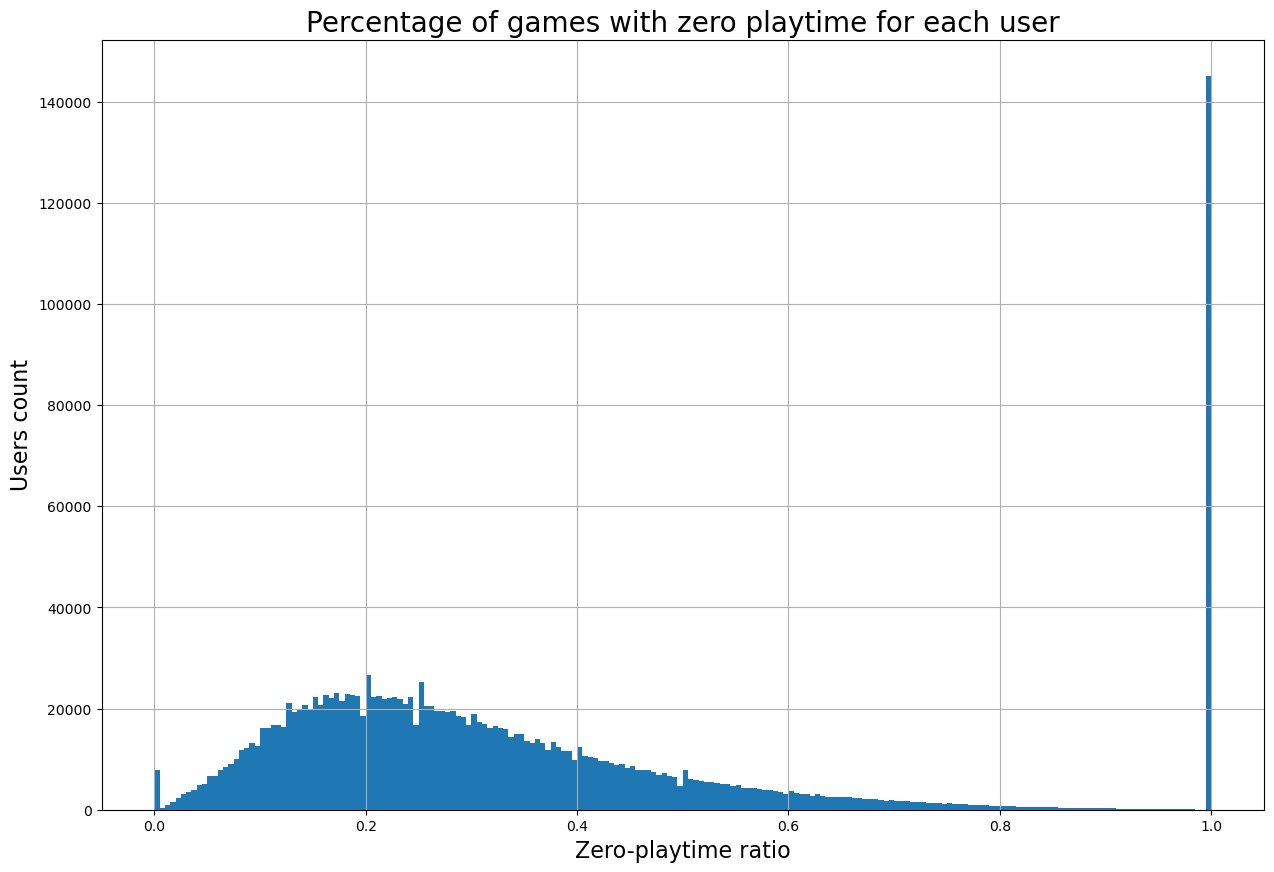

In [37]:
plot(zero_playtime_ratio_users, 'Users count', 
     'Zero-playtime ratio',
     'Percentage of games with zero playtime for each user')

**Conclusions**:
* The majority of users have unplayed games, most have 20% of unplayed games
* Less than 10% of users have not played any owned games

In [38]:
playtime_users = group_data(steamid_appid_playtime_df, "steamid", "mean")

describe_perc(playtime_users).round(4)

count    1.737372e+06
mean     1.902923e+03
std      3.600891e+03
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      1.936265e+02
25%      6.627744e+02
50%      1.323379e+03
75%      2.349012e+03
90%      3.875901e+03
95%      5.293294e+03
99%      1.020799e+04
max      9.101531e+05
dtype: float64

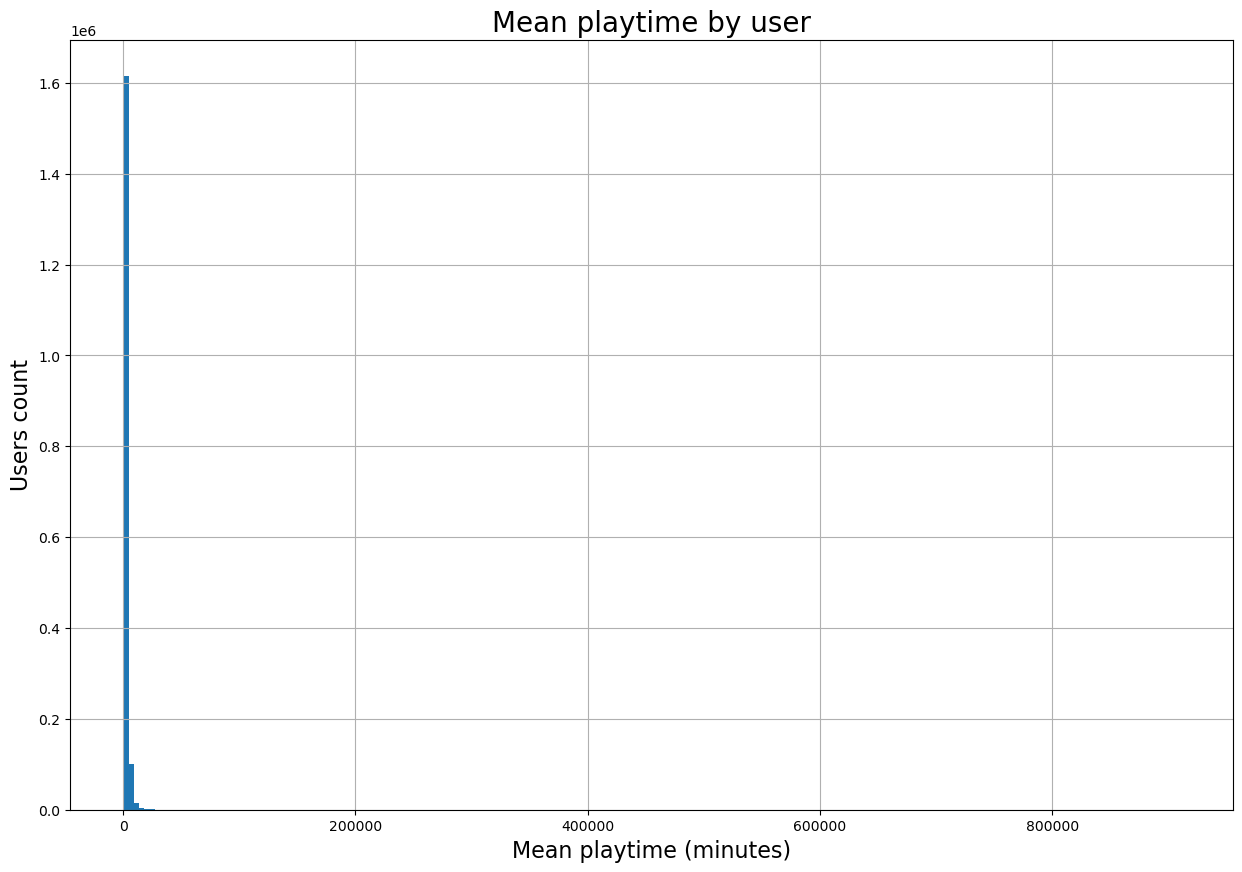

In [39]:
plot(playtime_users, 'Users count', 
     'Mean playtime (minutes)',
     'Mean playtime by user')

In [40]:
filtered_playtime_users = filter_data(playtime_users, 0.01, 0.99) 

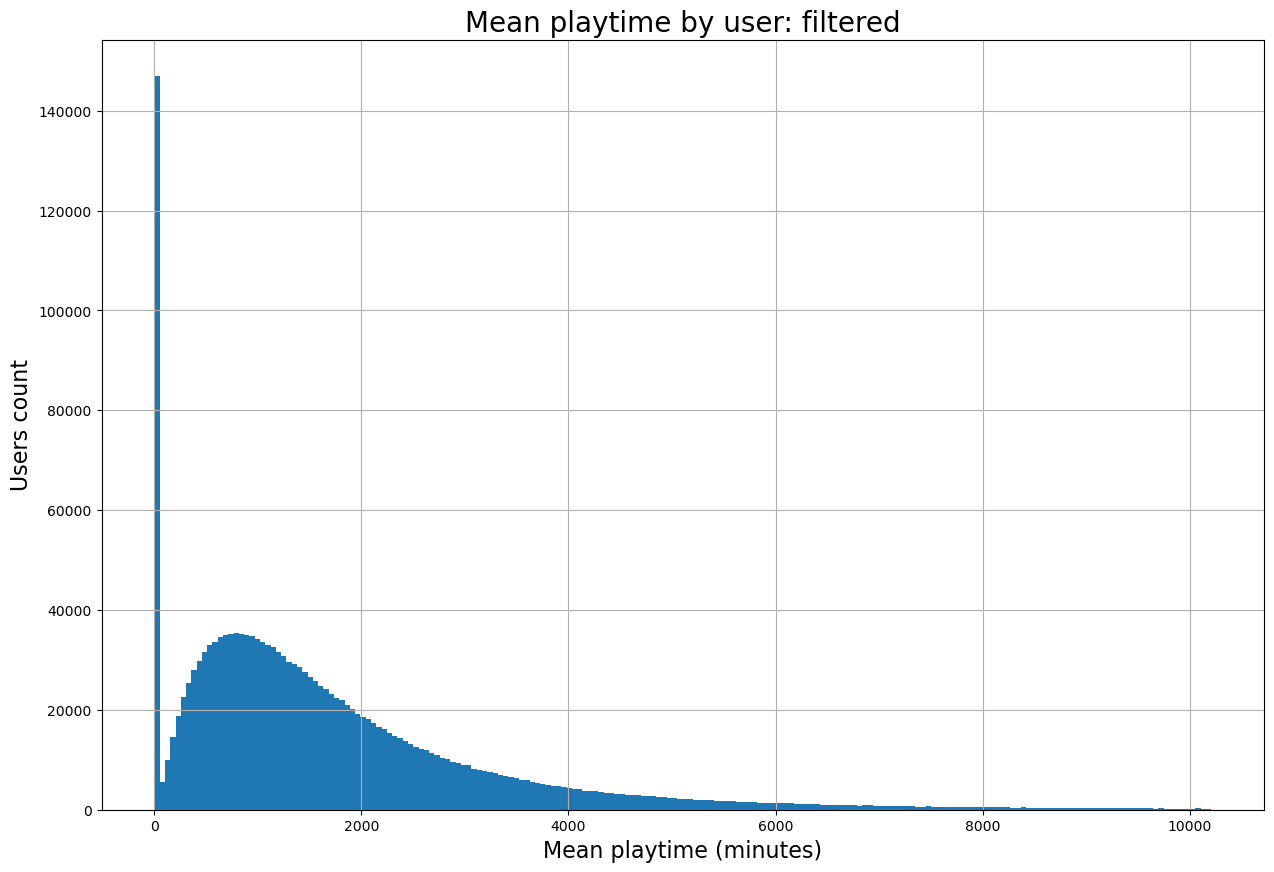

In [41]:
plot(filtered_playtime_users, 'Users count', 
     'Mean playtime (minutes)',
     'Mean playtime by user: filtered')

**The majority of users on average spend less than 2,000 minutes (approximately 33 hours) playing one game**

## Playtime minutes by games

In [42]:
zero_playtime_ratio_games = steamid_appid_playtime_df.groupby('appid')['playtime_minutes'].apply(lambda x: (x == 0).mean())

describe_perc(zero_playtime_ratio_games)

count    38514.000000
mean         0.571309
std          0.253426
min          0.000000
1%           0.121292
5%           0.199724
10%          0.250000
25%          0.350749
50%          0.547523
75%          0.813323
90%          0.922223
95%          0.952802
99%          1.000000
max          1.000000
Name: playtime_minutes, dtype: float64

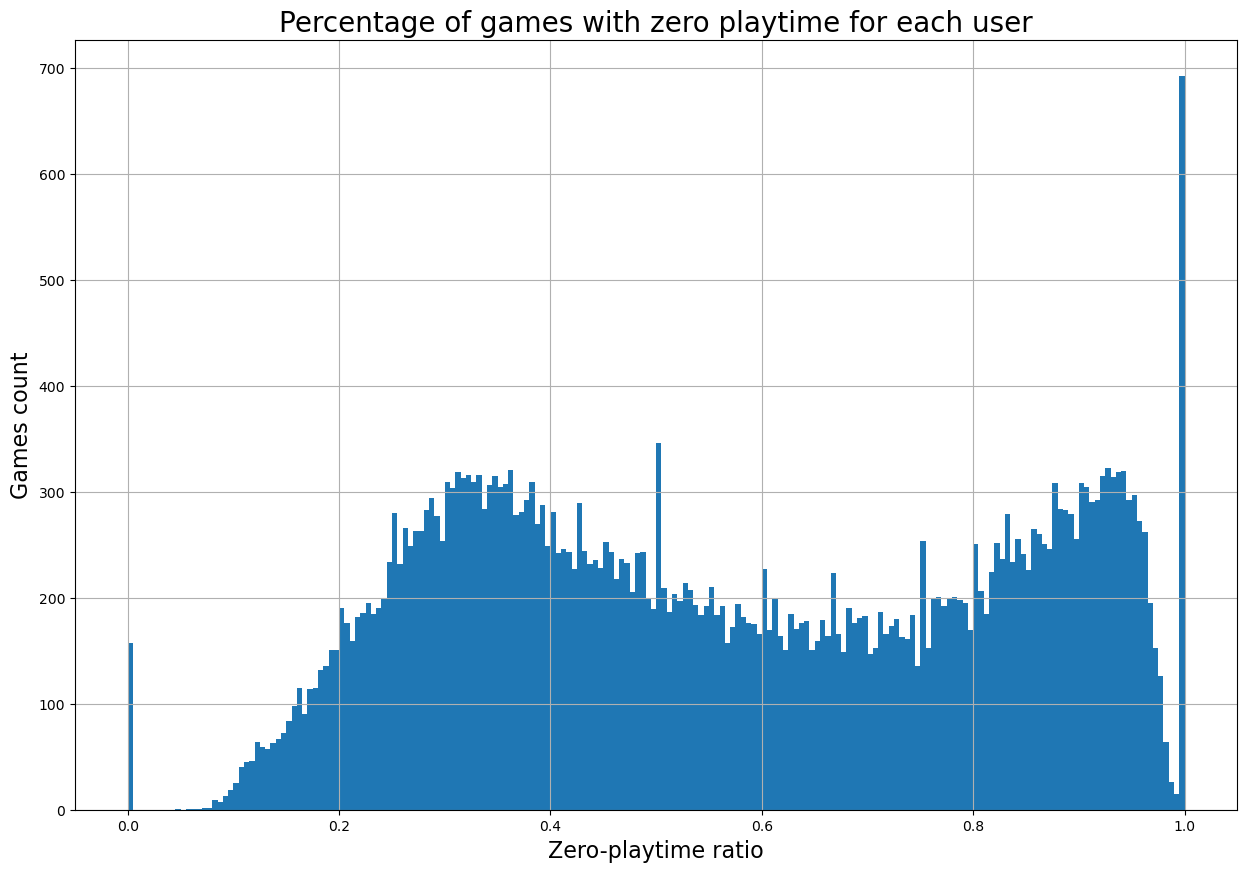

In [43]:
plot(zero_playtime_ratio_games, 'Games count', 
     'Zero-playtime ratio',
     'Percentage of games with zero playtime for each user')

In [44]:
playtime_games = group_data(steamid_appid_playtime_df, "appid", "mean")

describe_perc(playtime_games)

count     38514.000000
mean        340.581638
std        1721.063517
min           0.000000
1%            0.000000
5%            3.982155
10%           9.789388
25%          30.781454
50%         111.930475
75%         238.600717
90%         613.368377
95%        1132.238666
99%        3903.715265
max      138077.250000
dtype: float64

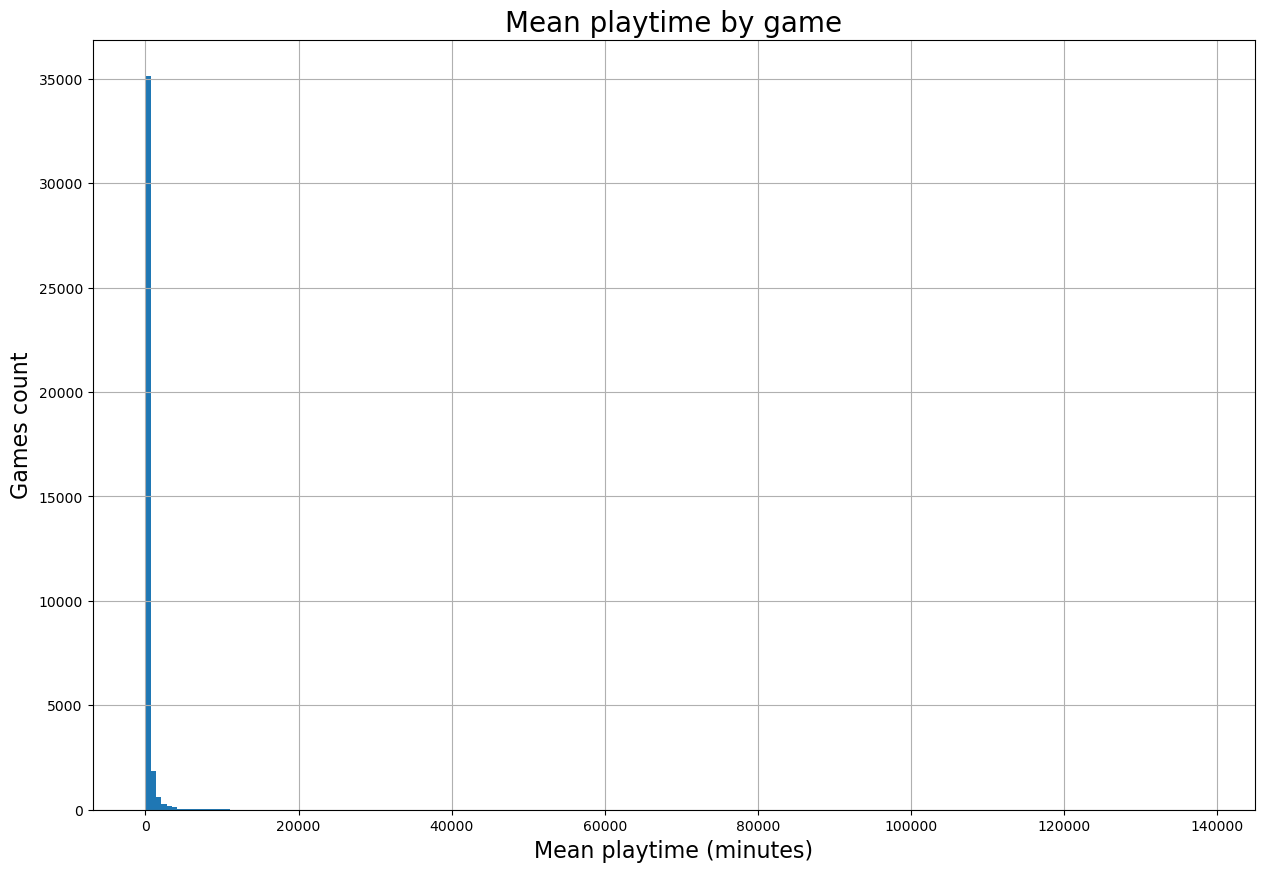

In [45]:
plot(playtime_games, 'Games count', 
     'Mean playtime (minutes)',
     'Mean playtime by game')

In [46]:
filtered_playtime_games = filter_data(playtime_games, 0.01, 0.99)  # between 1% and 99%

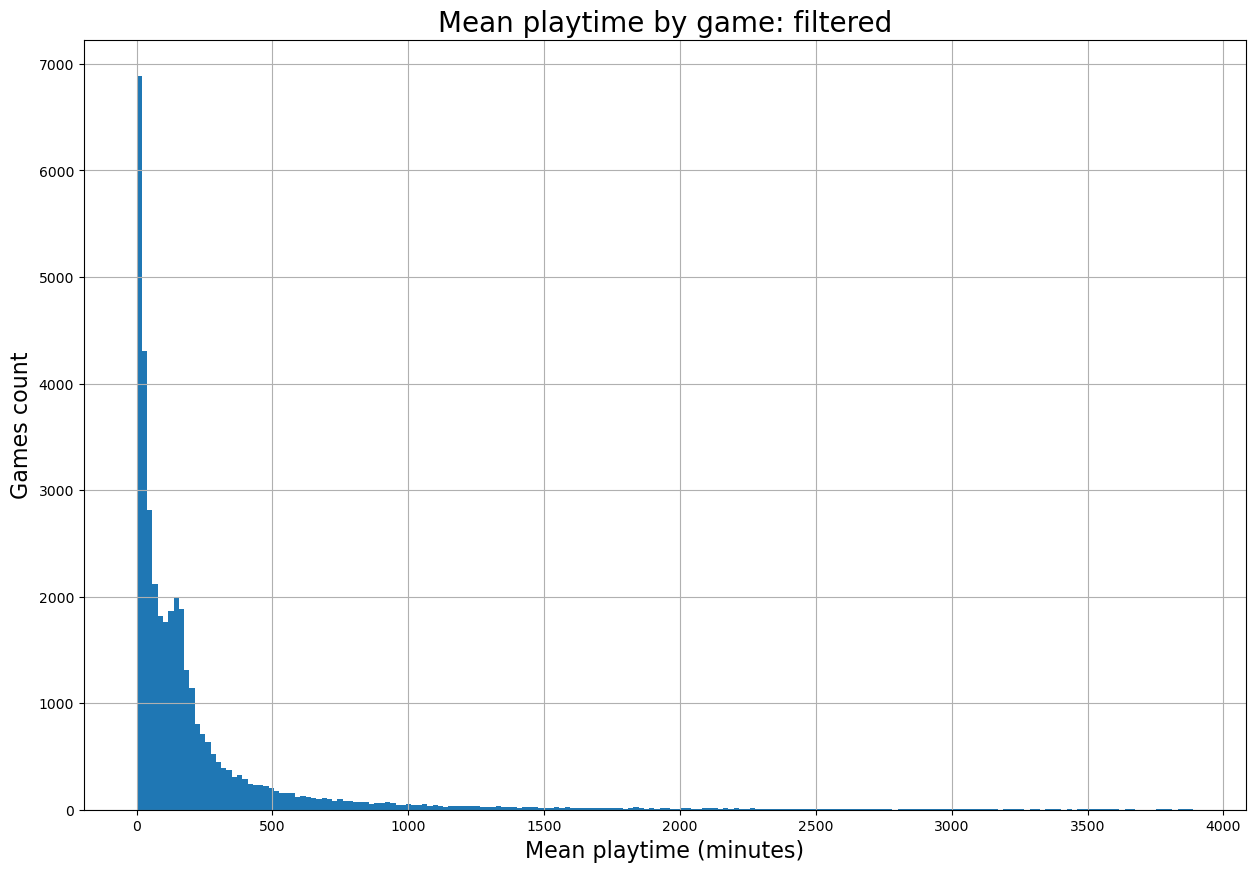

In [47]:
plot(filtered_playtime_games, 'Games count', 
     'Mean playtime (minutes)',
     'Mean playtime by game: filtered')

**For most games, the average time users play them is about 4 hours.
According to the graph we can notice the presence of two groups of games depending on the average time of playing them**

# Conclusions:
- About half of the observations in the sample have zero playtime
- There are outliers in the data, but they are around 1-2%

- Most users buy less than 200 games
- Most games are purchased by less than 5000 users

- The majority of users on average spend less than 2,000 minutes (approximately 33 hours) playing one game
- For most games, the average time users play them is about 4 hours